In [ ]:
'''Project 1 :
    Problem Statement :
        we need to predict the chance of admission based on the student various scores
        - Features/Independent Variables
        1.GRE Score
        2.TOEFL score
        3.University Rating
        4.SOR
        5.LOR
        6.CGPA
        7.Research
        
        -Label/Target
        1.Chance of Admission
        '''

Importing necessary libraries..

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
ad = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv")
ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
ad.shape

(500, 9)

In [4]:
ad.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
ad.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

There are null values in our Dataset.

So, Will need to fill the null values using pandas

In [9]:
ad['GRE Score'] = ad['GRE Score'].fillna(ad['GRE Score'].mean())
ad['TOEFL Score'] = ad['TOEFL Score'].fillna(ad['TOEFL Score'].mean())
ad['University Rating'] = ad['University Rating'].fillna(ad['University Rating'].mean())

In [10]:
ad.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

As, there are no null values left in our Dataset, so let move forward

In [14]:
ad.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Dropping all unwanted columns.

In [18]:
ad = ad.drop(columns=['Serial No.'])

In [19]:
ad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


**lets visualize the data & analyze the relationship between Independent and Dependent varible and how the data is distributed for ever column**

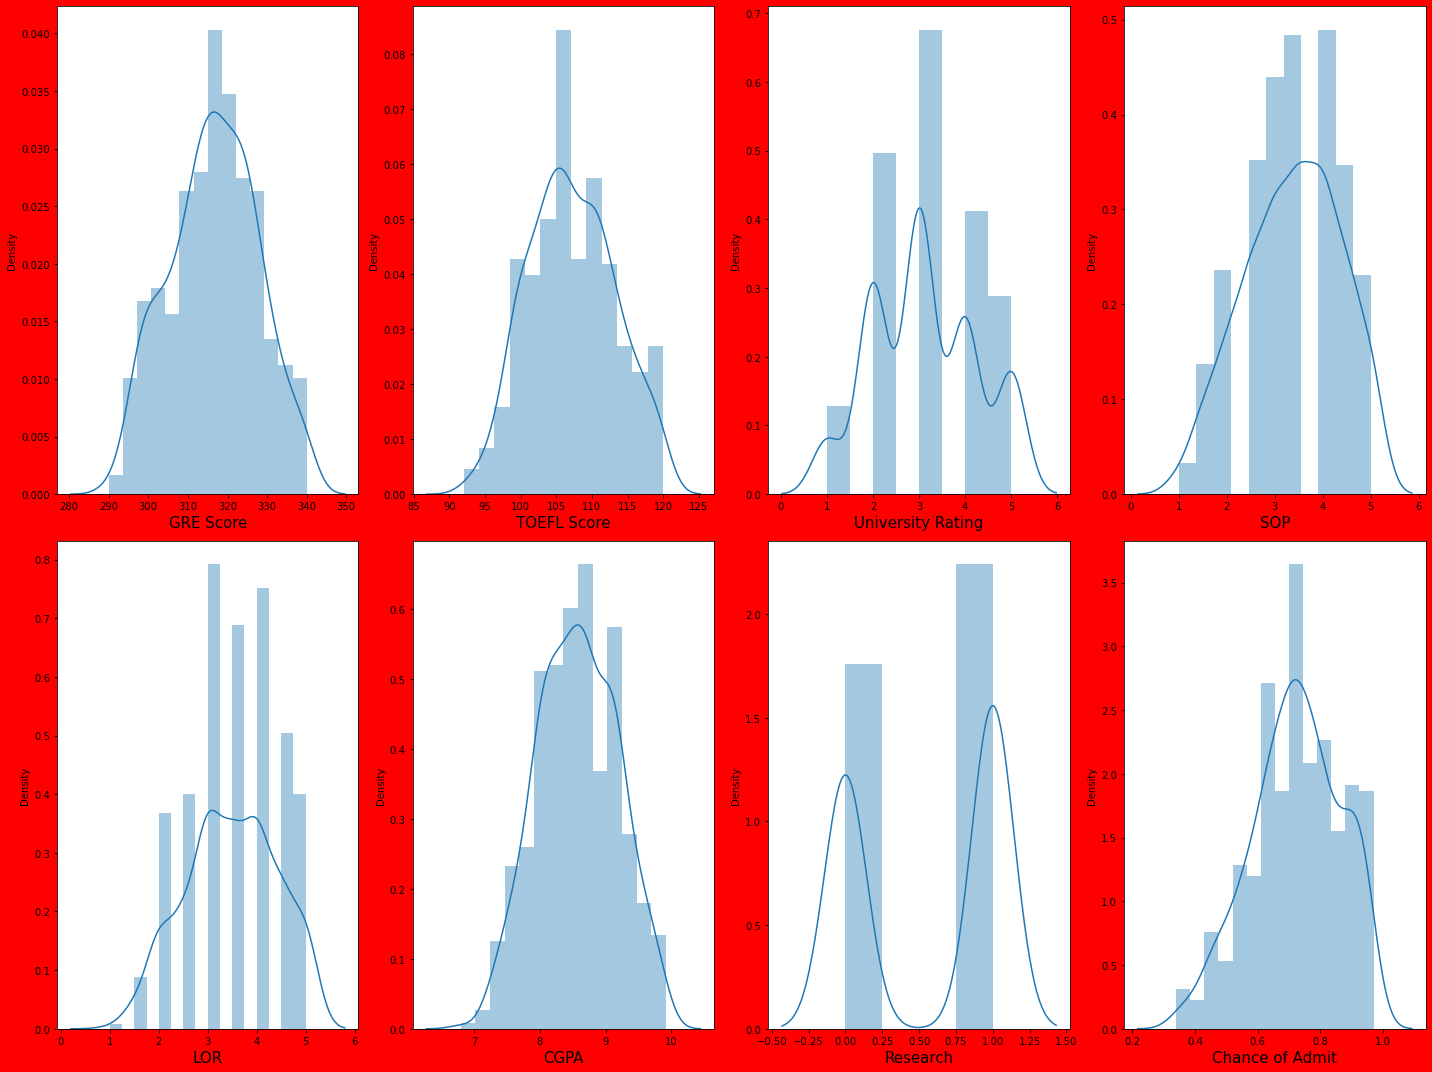

In [26]:
plt.figure(figsize = (20,15) ,facecolor = 'red')
plotnumber = 1

for column in ad:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(ad[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.tight_layout()

**This plot shows that the data is very close to normally distributed, and seems good to send these dataset to our model, and no skewness present.**

In [27]:
ad.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


Now, Lets divide the Dataset into Features and Labels.(x = feature, y = label)

In [29]:
x = ad.drop(columns = ['Chance of Admit'])
y = ad['Chance of Admit']

In [30]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [32]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

**Visulization of the Relationship between Features & Label**

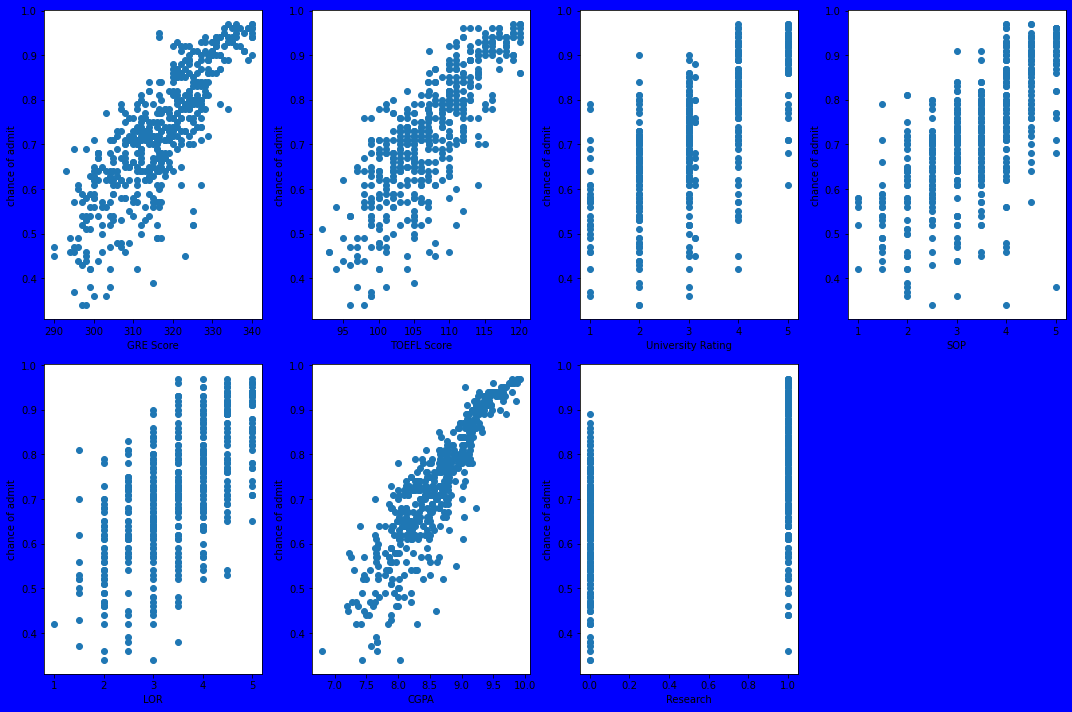

In [33]:
plt.figure(figsize=(15,10), facecolor='blue')
plotnumber = 1

for column in x:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 10)
        plt.ylabel('chance of admit',fontsize=10)
    plotnumber += 1
plt.tight_layout()

Now, we use StandardScaler to our DataSet so that we remove units and make the data similer for our model. So that our model will treat every data equally.

In [37]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [38]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

These are the unitless Features. We use StandardScaler Function to make the features data unitless for our model. We can only use StandardScaler on Features

# Training the Model

**-Train Test Split**

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 4 )

In [41]:
y_test.head()

66     0.61
152    0.86
123    0.61
285    0.93
70     0.94
Name: Chance of Admit, dtype: float64

**-Model Instantiating & Trainning**

In [45]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

Through this command we train our model, now we will let the model to predict by giving some data

**-Model's Prediction:**

In [46]:
ad.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [47]:
print('Chance of Admit : ', regression.predict(scaler.transform([[312, 103, 4.0, 4.0, 5.0, 8.43, 0]])))

Chance of Admit :  [0.69692819]


In [48]:
print('Chance of Admit : ', regression.predict(scaler.transform([[327, 113, 4.0, 4.5, 4.5, 9.04, 0]])))

Chance of Admit :  [0.82662151]


**-Adjusted R2 Score**

In [50]:
regression.score(x_train,y_train)

0.821570195321753

This is the model confidence (82%) of our model based on 75% of trainned data

In [51]:
regression.score(x_test,y_test)

0.8115153366332373

This is the model confidence (81%) of our model based on rest 25% of test data

**-Let's Now Plot & Visualize**

In [52]:
y_pred = regression.predict(x_test)
y_pred

array([0.79811661, 0.8486578 , 0.65473847, 0.88546392, 0.9339178 ,
       0.76646058, 0.6357384 , 0.7678531 , 0.77279646, 0.83553482,
       0.66239292, 0.58721195, 0.76679198, 0.72403489, 0.80642911,
       0.65385028, 0.49599705, 0.70132763, 0.84670413, 0.63296378,
       0.53877766, 0.70614027, 0.83702733, 0.76769937, 0.58373139,
       0.48270738, 0.55865179, 0.57218574, 0.94964593, 0.72251722,
       0.96611717, 0.83058599, 0.86339317, 0.86217929, 0.83723058,
       0.80906057, 0.59411565, 0.61784946, 0.67330054, 0.91246872,
       0.73789181, 0.94380279, 0.84891334, 0.82662151, 0.83175975,
       0.62963062, 0.85732288, 0.78610355, 0.74549082, 0.65112739,
       0.78491355, 0.73256391, 0.64701504, 0.92543918, 0.60277094,
       0.89729217, 0.85628291, 0.74774515, 0.56045168, 0.69786793,
       0.65539293, 0.95138129, 0.91918518, 0.72527291, 0.70574362,
       0.71372745, 0.95195083, 0.89440576, 0.75202821, 0.97821116,
       0.69354162, 0.53303379, 0.82793595, 0.83120865, 0.53648

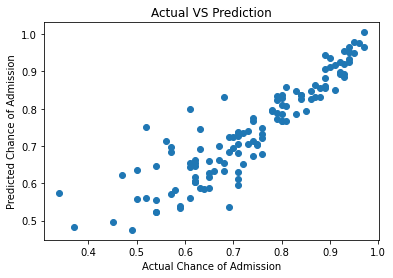

In [53]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Chance of Admission")
plt.ylabel("Predicted Chance of Admission")
plt.title("Actual VS Prediction")
plt.show()

# Model Evalution(matrices)

**-Mean Absolute Error (MAE)**

In [63]:
y_pred = regression.predict(x_test)
mean_absolute_error (y_test, y_pred)

0.042132267634249314

**-Mean Squared Error (MSE)**

In [64]:
a = mean_squared_error (y_test, y_pred)
a

0.0037496686566991693

**-Root Mean Squared Error (RMSE)**

In [66]:
np.sqrt(a)

0.06123453810309317

**Now save the model for later use**

In [68]:
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

** COMPLETED BUILDING THE LINEAR REGRESSION MODEL **